# <center>A Simple Implementation of Markov Chain Monte Carlo</center>

Markov Chain Monte Carlo (MCMC) is a sampling method that is particularly useful in Bayesian inference as it enables the approximation of certain properties of a posterior distribution that cannot be calculated directly. 

Monte Carlo methods refer to a broad class of algorithms that employ repeated, random sampling to approximate solutions to quantitative problems. For example, if an integral or sum cannot be computed exactly, it is usually possible to approximate it via Monte Carlo sampling. The approach is to view the integral or sum as if it were the expectation of some function with respect to a probability distribution and to approximate the expectation by a corresponding average. If for the multivariate, random variable (also known as the random vector) $\textbf{X}$ we have some function $f(\textbf{X})$ and the probability distribution $p(\textbf{X})$, the expectation is given by

$$\mathbb{E} [f(\textbf{X})]=\int p(\textbf{X})f(\textbf{X})d\textbf{X}\tag{1}$$

Drawing $N$ samples independently from $p(\textbf{X})$ permits the expectation to be approximated by a finite sum

$$\hat{f}=\frac{1}{N}\sum^n_{i=1}f(\textbf{X}^i)\tag{2}$$

As $N$ grows large, the average converges to the expected value, i.e., we have $\mathbb{E} [f]=\mathbb{E} [\hat{f}]$.

A Markov chain is a stochastic (random) process in which the evolution of the chain depends only on the current state of the chain and a transition probability. More formally, a sequence $\textbf{X}_1,\textbf{X}_2,...,\textbf{X}_N$ of multivariate, random variables is a Markov chain if the conditional distribution of $\textbf{X}_{n+1}$ given $\textbf{X}_1,\textbf{X}_2,...,\textbf{X}_n$ is dependent on $\textbf{X}_n$ only, i.e.

$$p(\textbf{X}_{n+1}|\textbf{X}_1,\textbf{X}_2,...,\textbf{X}_n)=p(\textbf{X}_{n+1}|\textbf{X}_n),\qquad \mbox{for}\ n\in \{1,2,...,N-1\} \tag{3}$$

where the $n$ are usually interpreted as indicating the number of elapsed time steps. The state space of the Markov chain is the set of possible values of the random variables $\textbf{X}_n$. The transition probabilities are defined by

$$T(\textbf{X}_n|\textbf{X}_{n+1}) \equiv p(\textbf{X}_{n+1}|\textbf{X}_n) \tag{4}$$

If these transition probabilities are the same for all $n$ then the Markov chain is homogeneous. 

We know from basic probability theory that the marginal distribution of the variable $\textbf{X}_{n+1}$ expressed in terms of the marginal distribution of the variable at the previous time step $\textbf{X}_n$ is given by

$$p(\textbf{X}_{n+1})=\sum_{\textbf{X}_n} p(\textbf{X}_{n+1}|\textbf{X}_n=\textbf{x}_n)p(\textbf{X}_n=\textbf{x}_n) \tag{5}$$

A distribution is stationary with respect to a Markov chain if each step in the chain leaves the distribution invariant. Therefore, from equation (5), for a homogeneous Markov chain, the distribution $p(\textbf{X})$ is invariant if

$$\begin{align}p(\textbf{X})&=\sum_\textbf{x'} p(\textbf{X}|\textbf{X}=\textbf{x'})p(\textbf{X}=\textbf{x'})\\
&=\sum_{\textbf{x'}}T(\textbf{X}=\textbf{x'}|\textbf{X})p(\textbf{X}=\textbf{x'})\tag{6}\end{align}$$

The property of detailed balance is defined by

$$p(\textbf{X}=\textbf{x'})T(\textbf{X}=\textbf{x'}|\textbf{X})=p(\textbf{X})T(\textbf{X}|\textbf{X}=\textbf{x'}) \tag{7}$$

Markov chains that respect detailed balance are reversible, meaning that the statistical evolution of the distribution is identical whether the chain runs forwards or backwards. Substituting equation (7) into equation (6) we find that

$$\begin{align}\sum_{\textbf{x'}}T(\textbf{X}=\textbf{x'}|\textbf{X})p(\textbf{X}=\textbf{x'})&=\sum_{\textbf{x'}}T(\textbf{X}|\textbf{X}=\textbf{x'})p(\textbf{X})\\
&=p(\textbf{X})\sum_{\textbf{x'}}p(\textbf{X}=\textbf{x'}|\textbf{X})\\
&=p(\textbf{X})\end{align}$$

since the sum of conditional probabilities is one. Therefore, if the transition probabilities are chosen to satisfy equation (7), the distribution will remain invariant.

Typically, we use MCMC when we cannot evaluate or directly draw samples from the target distribution, $p(\textbf{X})$, but can evaluate $f(\textbf{X})$, where $p(\textbf{X})=Cf(\textbf{X})$, and $C$ is a normalising constant. To sample from the desired distribution via MCMC, we construct the Markov chain so that as $n\rightarrow\infty$, $f(\textbf{X}_n)$ converges to the stationary distribution$f(\textbf{X})$, regardless of the initial distribution. This property is known as ergodicity and requires that the Markov chain be both irreducible and aperiodic. In an irreducible chain we can eventaully get from any state to any other state. Aperiodicity results in non-regular, non-repeating transitions between states, with the distribution eventually settling to an equilibrium (periodic Markov chain demonstrate distributions that repeat values at regular intervals). Together, irreducibility and aperiodicity ensure convergence from any initial state to a unique stationary distribution (the distribution cannot tend to multiple equilibriums).


## The Metropolis-Hastings Algorithm

1. Initialise $\textbf{x}_0$.

2. For $i=0$ to $N-1$

    - Sample $u$ ~ $U[0,1]$

    - Sample $\textbf{x}'$ ~ $q(\textbf{x'}|\textbf{x}_i)$ 

    - If $u<A(\textbf{x'}, \textbf{x}_i)=\mbox{min}\Bigl\{1, \frac{f(\textbf{x'})q(\textbf{x}_i|\textbf{x'})}{f(\textbf{x}_i)q(\textbf{x'}|\textbf{x}_i)}\Bigr\}$

        &emsp;&emsp;$\textbf{x}_{i+1}=\textbf{x}'$

    else

        &emsp;&emsp;$\textbf{x}_{i+1}=\textbf{x}_i$
        
The Metropolis-Hastings (MH) algorithm involves sampling a candidate value $\textbf{x'}$ given the current value $\textbf{x}$, according to the proposal function $q(\textbf{x'}|\textbf{x})$. The new value, $\textbf{x'}$, is either accepted or refused, in accordance with the acceptance probability $A(\textbf{x'}, \textbf{x}_i)$. Since the algorithm generates a sequence of values, where the next proposed value has a random dependence on the current value only, it describes a Markov chain. As it does this random sampling repeatedly, it is in fact an MCMC algorithm.

From

$$A(\textbf{x'}, \textbf{x})=\mbox{min}\biggl\{1, \frac{f(\textbf{x'})q(\textbf{x}|\textbf{x'})}{f(\textbf{x})q(\textbf{x'}|\textbf{x})}\biggr\} \tag{8}$$

we can show that $f(\textbf{x})$ is a stationary distribution of the Markov chain defined by the MH algorithm:

$$\begin{align}f(\textbf{x})q(\textbf{x'}|\textbf{x})A(\textbf{x'}, \textbf{x})&=\mbox{min}\bigl\{f(\textbf{x})q(\textbf{x'}|\textbf{x}), f(\textbf{x'})q(\textbf{x}|\textbf{x'})\bigr\}\\
&=\mbox{min}\bigl\{f(\textbf{x'})q(\textbf{x}|\textbf{x'}), f(\textbf{x})q(\textbf{x'}|\textbf{x})\bigr\}\\
&=f(\textbf{x'})q(\textbf{x}|\textbf{x'})\;\mbox{min}\biggl\{1, \frac{f(\textbf{x})q(\textbf{x'}|\textbf{x})}{f(\textbf{x'})q(\textbf{x}|\textbf{x'})}\biggr\}\\
&=f(\textbf{x'})q(\textbf{x}|\textbf{x'})A(\textbf{x}, \textbf{x'}) \tag{9} \end{align}$$

i.e., $f(\textbf{x})$ satisfies detailed balance (equation (7)).

The success of the MH algorithm often hinges on the choice of the proposal distribution. When a symmetric proposal distribution function is selected we have $q(\textbf{x'}|\textbf{x})=q(\textbf{x}|\textbf{x'})$ and the acceptance reduces to

$$A(\textbf{x'}, \textbf{x})=\mbox{min}\biggl\{1, \frac{f(\textbf{x'})}{f(\textbf{x})}\biggr\} \tag{10}$$
 
When the acceptance take this form, the algorithm is known as just the Metropolis algorithm. This is the algorithm that we will demonstrate in this notebook. Our aim is to sample from a two-dimensional Gaussian distribution without knowing the normalising factor.

A Markov chain may be initialised in a low-probability region of the state space, with early samples possibly biasing results even if the chain does ultimately approach the equilibrium distribution. To counter this effect, a burn-in period is typically implemented, in which the earliest samples are discarded. We will employ this method in our Metropolis algorithm.

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal


def metropolis_2D(returned_samples, target_dist, x_0 = None, proposal_cov = None, 
                           burn_in = 0.5):
    
    # the number of samples we need to return the desired number after burn-in
    no_samples = math.ceil(returned_samples / burn_in)
    
    x_list = []
    # set zero mean if it is not specified
    if x_0 is None:
        
        x_0 = np.array([0, 0])
    # set covariance to the identity matrix if it is not specified    
    if proposal_cov is None:
        
        proposal_cov = np.eye(2)
        
    x = x_0    
    # generate infinite loop
    while True:
        
        # generate random number between 0 and 1
        u = np.random.rand()
        # sample from a multivariate Gaussian proposal function
        x_p = np.random.multivariate_normal(x, proposal_cov)
        # choose the smallest of the two values    
        acceptance = np.min([1, ((target_dist(x_p)+np.finfo(float).eps)/(target_dist(x)+np.finfo(float).eps))])
        # if the random number is smaller than the acceptance value
        if u < acceptance:
            # reassign x to the sampled value
            x = x_p
            x_list.append(x)
            
        # terminate the loop when we have enough samples    
        if len(x_list) >= no_samples:
            
            break
    # discard the earlier samples (burn-in)        
    burned_samples = x_list[-returned_samples:]
    
    return burned_samples


def mult_gaussian_f(x):
    # the distribution f(x), unknown normalising factor
    
    dist = np.exp(-0.5*(np.dot(np.dot((x-mu),inv),(x-mu))))
    
    return dist


def plot_distribution(x_samples, y_samples, mu, inv, det):

    fig = plt.figure(figsize=(8,8))
    # generate grid layout for the placing of subplots
    gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4), left=0.1, 
                          right=0.9, bottom=0.1, top=0.9, wspace=0.05, hspace=0.05)
    # create first subplot
    ax = fig.add_subplot(gs[1, 0])
    # create two subplots that share a common axis with ax
    ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
    ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
    # plot histograms
    ax_histx.hist(x_samples, bins=100)
    ax_histy.hist(y_samples, bins=100, orientation='horizontal')
    # remove tick labels from histograms
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)
    # scatter plot
    ax.scatter(x_samples, y_samples, s=5)
    ax.set_xlim(11, 19)
    ax.set_ylim(-26, -18)
    # create contour plot of p(x)
    x = np.linspace(10, 20, 1000)
    y = np.linspace(-25, -15, 1000)
    X, Y = np.meshgrid(x, y)
    pos = np.dstack((X,Y))
    mv = multivariate_normal(mu, cov)
    p = mv.pdf(pos)
    levels = np.linspace(0, 0.175, 12)
    cs = ax.contour(X, Y, p, levels, colors='r')
    
    plt.show()

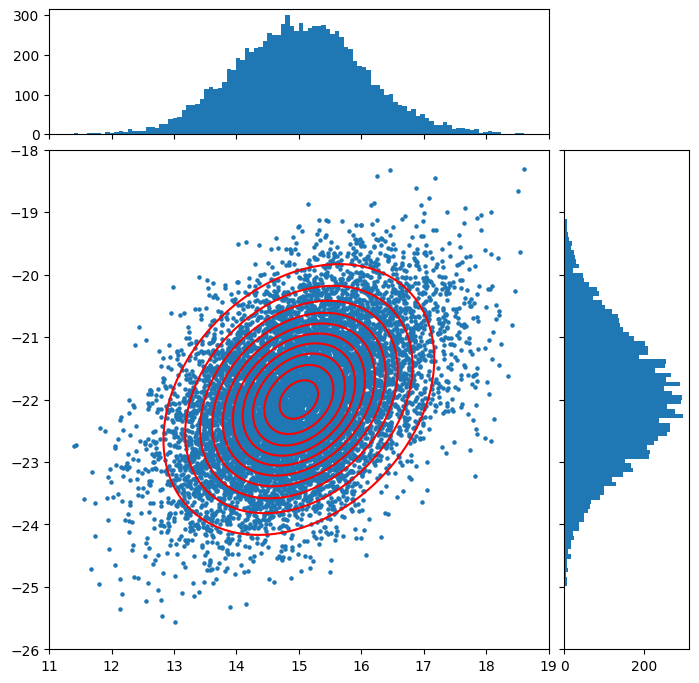

In [3]:
# set parameters for target Gaussian distribution
mu = np.array([15, -22])
cov = np.array([[1, 0.6], [0.3, 1]])
inv = np.linalg.inv(cov)
det = np.linalg.det(cov)

# run the metropolis algorithm and plot the results
samples = metropolis_2D(10000, mult_gaussian_f, burn_in=0.75)
x_samples = [sample[0] for sample in samples]
y_samples = [sample[1] for sample in samples]
plot_distribution(x_samples, y_samples, mu, inv, det)

In the plot we can see that our Metropolis algorithm appears to be sampling from the desired Gaussian distribution (visualised with the red contour lines). If we generate a small number of samples, the algorithm is inconsistent in its performance. However, with a large number of samples, it consistently converges to equilibrium, i.e., the desired distribution. 

## References

Andrieu, A., et al. 2003. An Introduction to MCMC for Machine Learning. Machine Learning, 50, pp. 5-43.

Bishop, C.M. 2006. Pattern Recognition and Machine Learning, Springer.

Geye, C.J. 2011. Introduction to Markov Chain Monte Carlo in Handbook of Markov Chain Monte Carlo, Chapman & Hall.
